In [54]:
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
im = Image.open('letters.png')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/PIL/Image.py:2896: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [12]:
im.size

(10000, 10000)

In [32]:
im.crop((0, 0, 1050, 1050)).save('letters_short.png', quality=95)

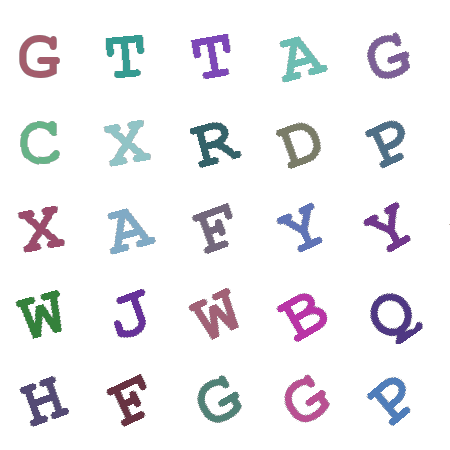

In [25]:
im.crop((0, 0, 450, 450))

In [8]:
img = Image.open('letters_short.png')

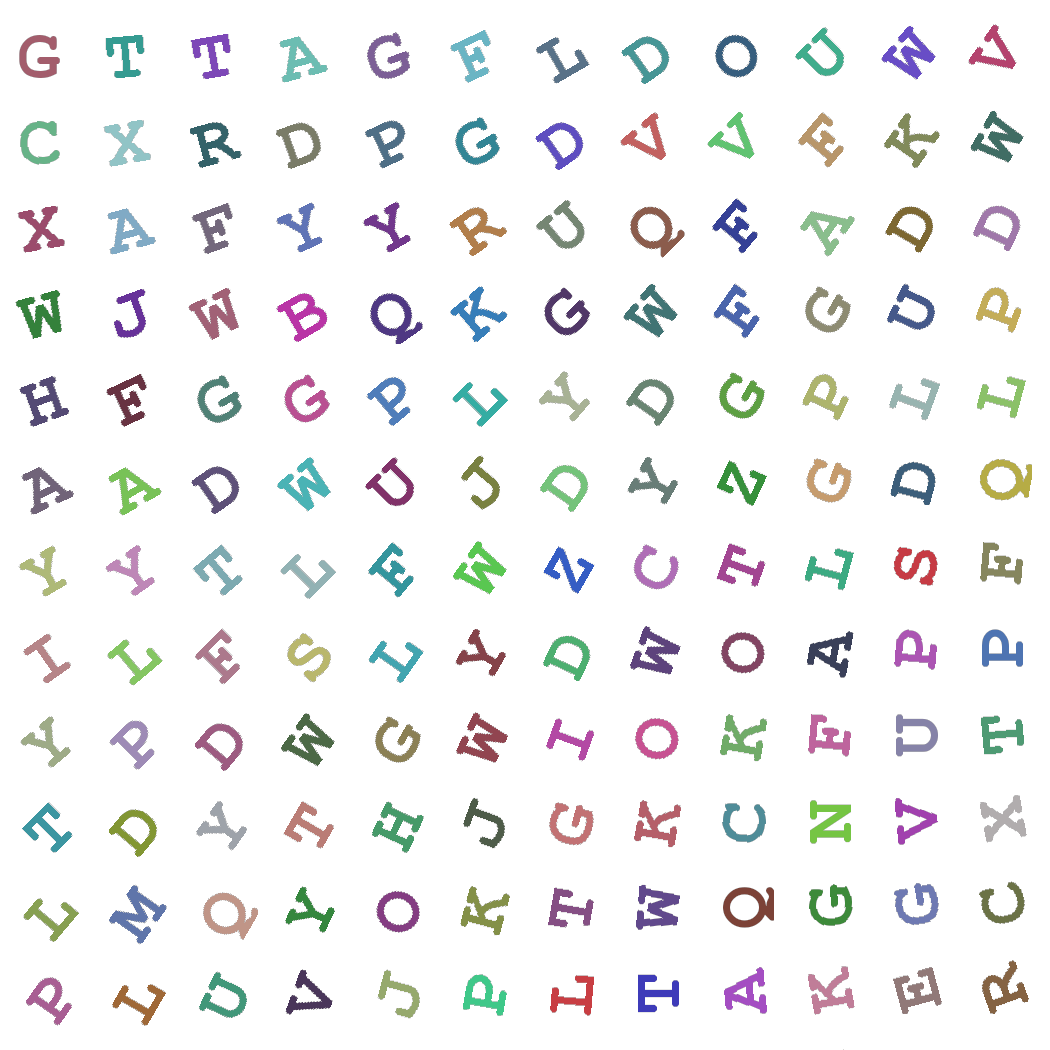

In [9]:
img

In [36]:
iar = np.asarray(img)
print(iar.shape)

(1050, 1050, 4)


In [39]:
for i in range(4):
    print(f'Start {i}\n')
    print(iar[:,:,i])
    print('\n\n')

Start 0

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]



Start 1

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]



Start 2

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]



Start 3

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]





In [41]:
np.mean(iar, axis=2).shape

(1050, 1050)

In [2]:
im = cv2.imread('letters_short.png')
gray=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]

In [ ]:
idx =0
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
    roi=im[y:y+h,x:x+w]
    cv2.imwrite(str(idx) + '.jpg', roi)
    #cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)

In [42]:
image = cv2.imread('letters_short.png')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
MARGIN = 10
HEIGHT = 80
WEIGHT = 80

# Find contours, obtain bounding box, extract and save ROI
ROI_number = 0
centers = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
centers = centers[0] if len(centers) == 2 else centers[1]
ws = []
hs = []
for c in centers:
    x,y,w,h = cv2.boundingRect(c)

    x,y,w,h = x-MARGIN,y-MARGIN,w+2*MARGIN,h+2*MARGIN
    center_x = x + w // 2
    center_y = y + h // 2
    # left_x, left_y = x, y
    # right_x, right_y = x + w, y + h
    left_x, left_y = center_x - WEIGHT // 2, center_y - HEIGHT // 2
    right_x, right_y = center_x + WEIGHT // 2, center_y + HEIGHT // 2
    left_x, left_y = max(left_x, 0), max(left_y, 0)
    right_x, right_y = min(right_x, original.shape[1]), min(right_y, original.shape[0])


    cv2.rectangle(image, (left_x, left_y), (right_x, right_y), (36,255,12), 2)
    # if ROI_number == 98:
    #     print(ROI_number)
    ROI = original[left_y:right_y, left_x:right_x]
    cv2.imwrite(os.path.join('data', f'letter_{center_x}_{center_y}.png'), ROI)
    ROI_number += 1
    ws.append(w)
    hs.append(h)

In [53]:
os.path.join('ww', 'sdad')

'ww/sdad'

In [43]:
ROI_number

144

In [44]:
ws = np.array(ws)
hs = np.array(hs)

In [45]:
ws.mean(), ws.max(), hs.mean(), hs.max()

(67.59722222222223, 78, 67.0625, 79)

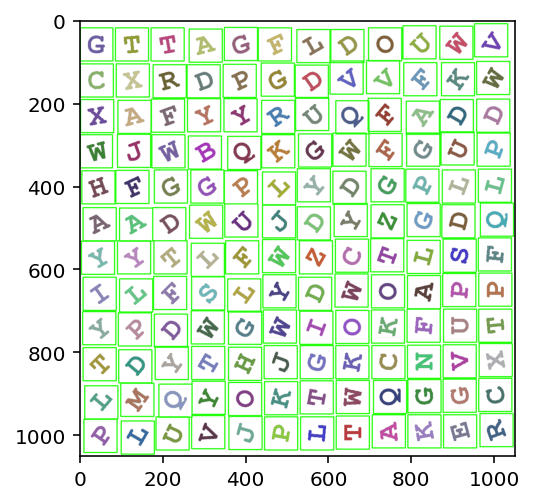

In [46]:
plt.imshow(image)
plt.show()